<a href="https://colab.research.google.com/github/santhoshmohan05/NeuralNetworks/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><b> Self Organising Maps </b></h2>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
import minisom

<h4><b>Data Preprocessing </b></h4>

In [5]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
dataset_file = '/content/gdrive/My Drive/CNN_Test_Datat/Credit_Card_Applications.csv'
dataset = pd.read_csv(dataset_file)
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [0]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)


In [0]:
som = minisom.MiniSom(x=20,y=20,input_len=14, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)


<b><h4>Visualize the SOM</b4></h4>

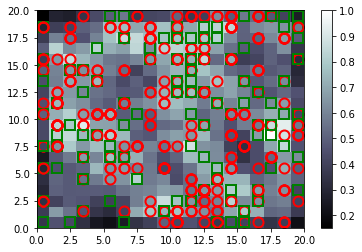

In [18]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()